# Housing Prices prediction using ANN

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)
    

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_name = "kc_house_data.csv"
Y_LABEL = "price"

DROP_ZIPCODE = True

#  Load Data

In [3]:
df = pd.read_csv(file_name)
house_df = pd.read_csv('kc_house_data.csv', encoding = 'ISO-8859-1')
print(df.keys())


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


# Explore Data

In [4]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [5]:
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

The data is pretty clean. There are no pesky nulls which we need to treat and most of the features are in numeric format. Let's go ahead and drop the "id" and "date" columns as these 2 features will not be used in this analysis.

In [8]:

df = df.drop(['id', 'date'], axis=1)
if DROP_ZIPCODE:
    df = df.drop('zipcode',axis=1)

Y = df[Y_LABEL]

X = df.drop(Y_LABEL, axis=1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   floors         21613 non-null  float64
 5   waterfront     21613 non-null  int64  
 6   view           21613 non-null  int64  
 7   condition      21613 non-null  int64  
 8   grade          21613 non-null  int64  
 9   sqft_above     21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
dtypes: float64(4), int64(13)
memory usage: 2.8 MB


In [10]:
X.describe().transpose()

count          mean           std        min       25%  \
bedrooms       21613.0      3.370842      0.930062     0.0000     3.000   
bathrooms      21613.0      2.114757      0.770163     0.0000     1.750   
sqft_living    21613.0   2079.899736    918.440897   290.0000  1427.000   
sqft_lot       21613.0  15106.967566  41420.511515   520.0000  5040.000   
floors         21613.0      1.494309      0.539989     1.0000     1.000   
waterfront     21613.0      0.007542      0.086517     0.0000     0.000   
view           21613.0      0.234303      0.766318     0.0000     0.000   
condition      21613.0      3.409430      0.650743     1.0000     3.000   
grade          21613.0      7.656873      1.175459     1.0000     7.000   
sqft_above     21613.0   1788.390691    828.090978   290.0000  1190.000   
sqft_basement  21613.0    291.509045    442.575043     0.0000     0.000   
yr_built       21613.0   1971.005136     29.373411  1900.0000  1951.000   
yr_renovated   21613.0     84.402258    401.679240     0.0000     0.000   
lat            21613.0     47.560053      0.138564    47.1559    47.471   
long           21613.0   -122.213896      0.140828  -122.5190  -122.328   
sqft_living15  21613.0   1986.552492    685.391304   399.0000  1490.000   
sqft_lot15     21613.0  12768.455652  27304.179631   651.0000  5100.000   

                     50%        75%           max  
bedrooms          3.0000      4.000  3.300000e+01  
bathrooms         2.2500      2.500  8.000000e+00  
sqft_living    1910.0000   2550.000  1.354000e+04  
sqft_lot       7618.0000  10688.000  1.651359e+06  
floors            1.5000      2.000  3.500000e+00  
waterfront        0.0000      0.000  1.000000e+00  
view              0.0000      0.000  4.000000e+00  
condition         3.0000      4.000  5.000000e+00  
grade             7.0000      8.000  1.300000e+01  
sqft_above     1560.0000   2210.000  9.410000e+03  
sqft_basement     0.0000    560.000  4.820000e+03  
yr_built       1975.0000   1997.000  2.015000e+03  
yr_renovated      0.0000      0.000  2.015000e+03  
lat              47.5718     47.678  4.777760e+01  
long           -122.2300   -122.125 -1.213150e+02  
sqft_living15  1840.0000   2360.000  6.210000e+03  
sqft_lot15     7620.0000  10083.000  8.712000e+05

In [11]:
FEATURE_LABELS = list(X.keys())

## Explore Correlation

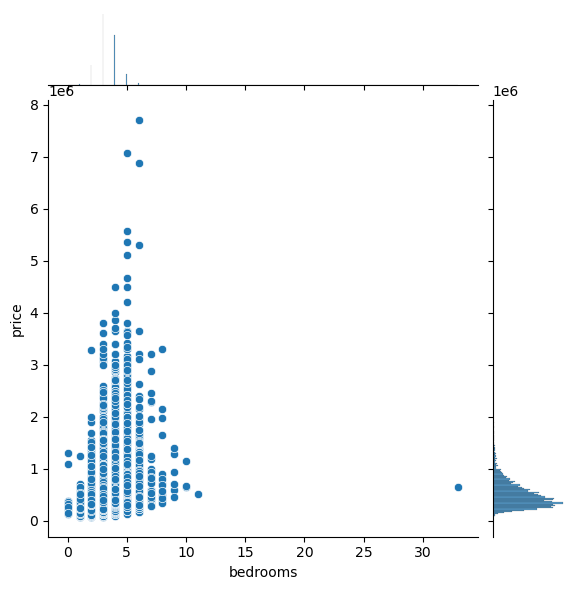

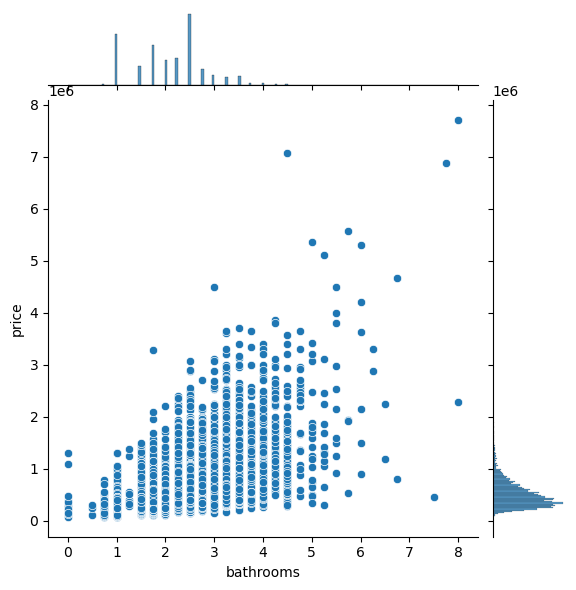

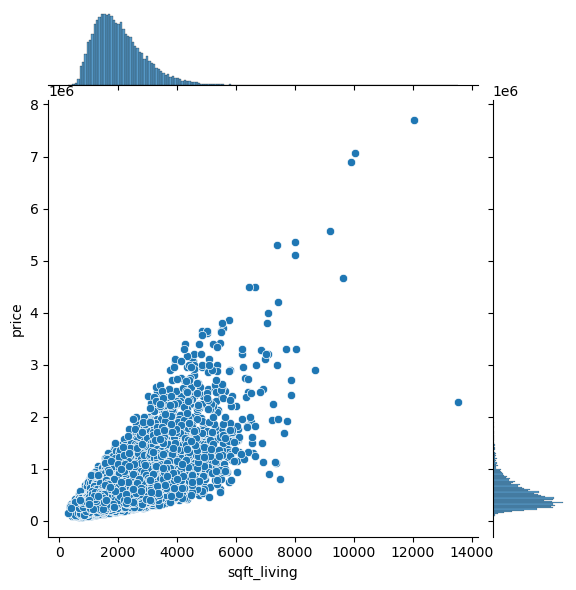

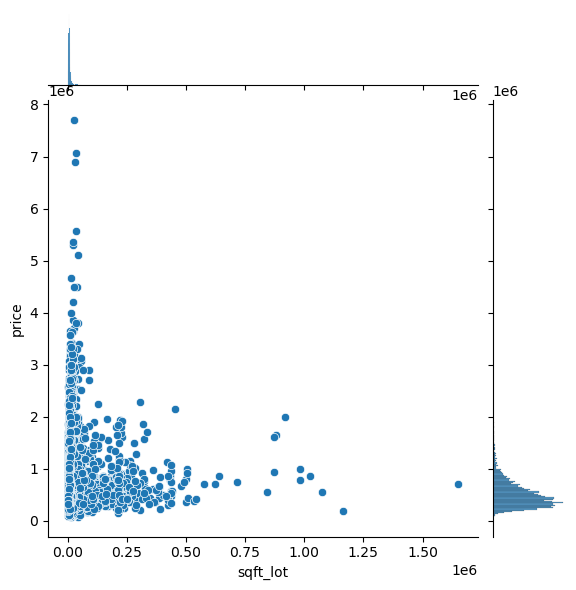

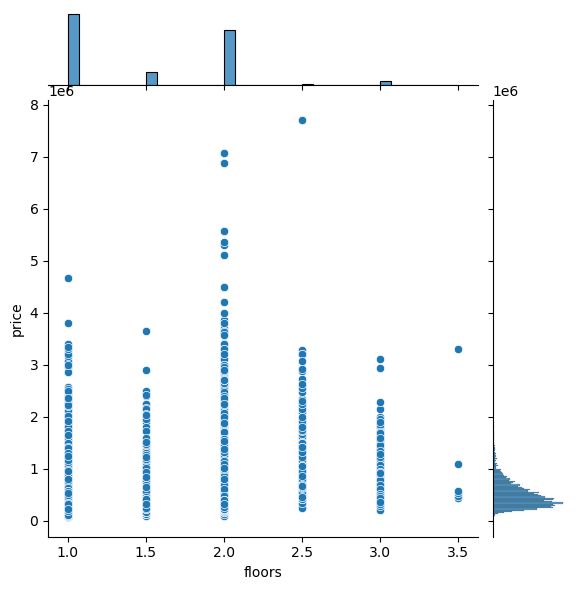

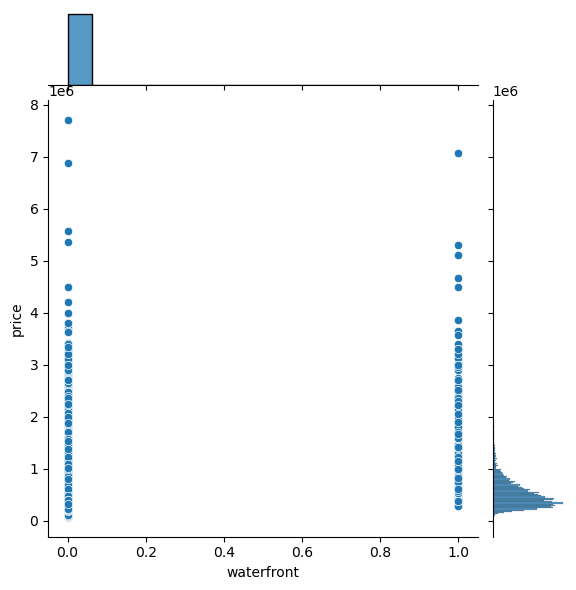

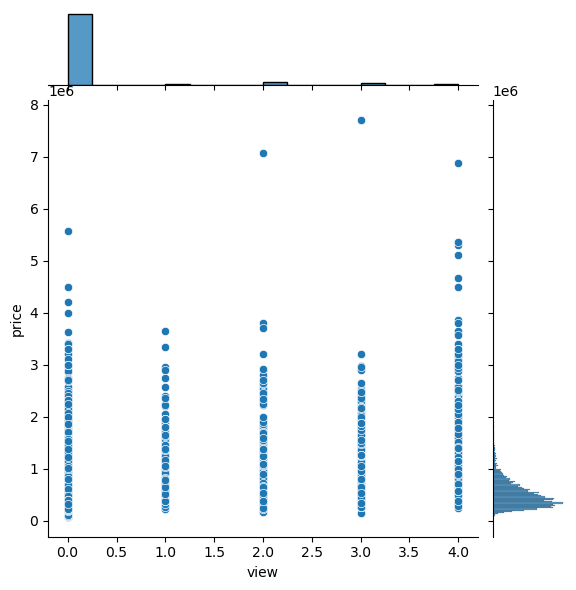

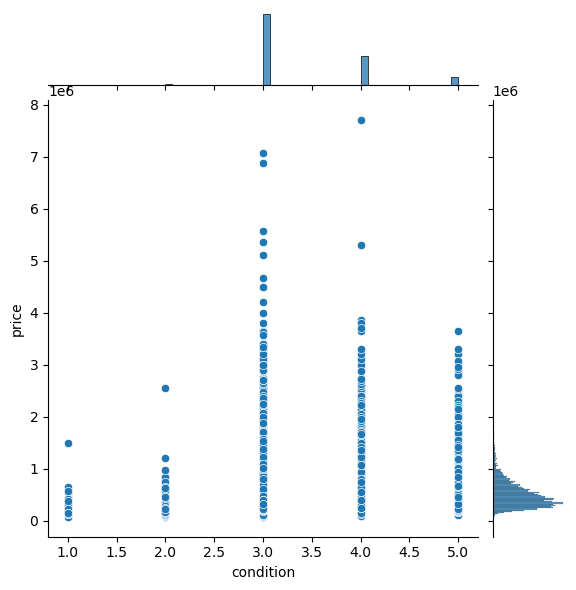

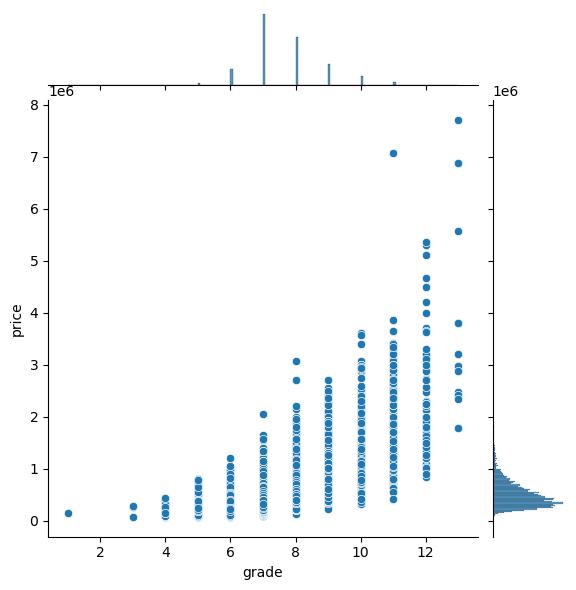

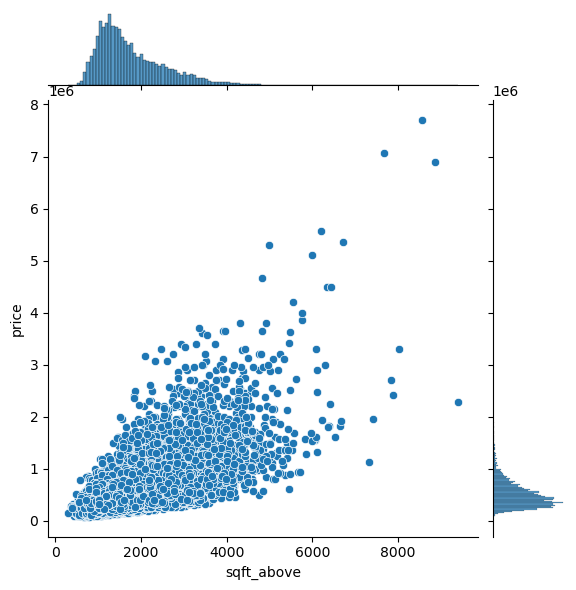

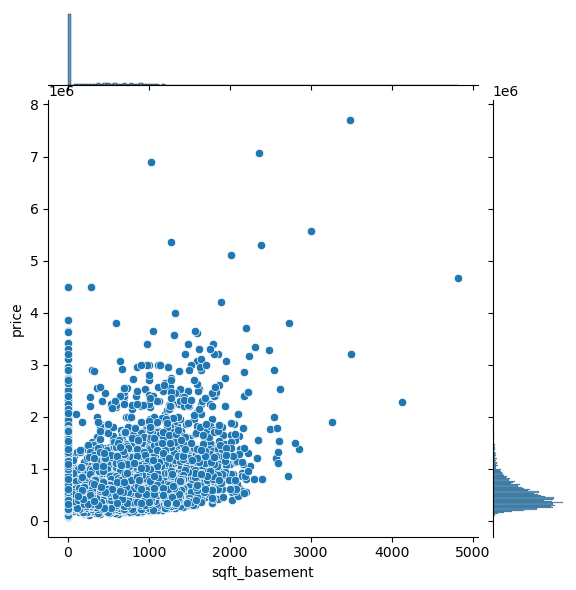

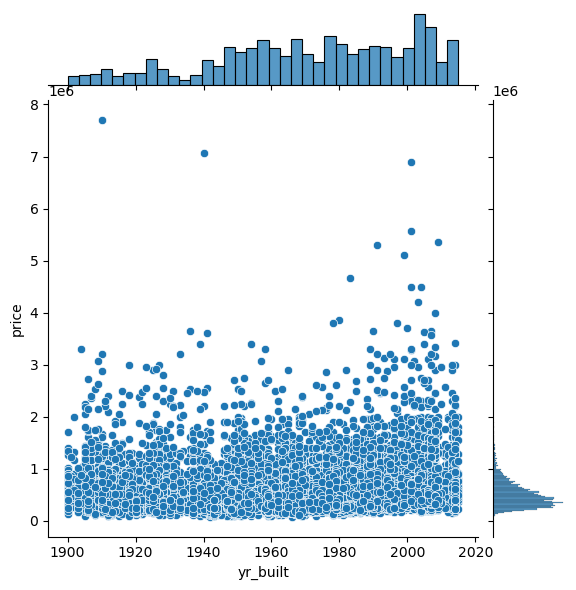

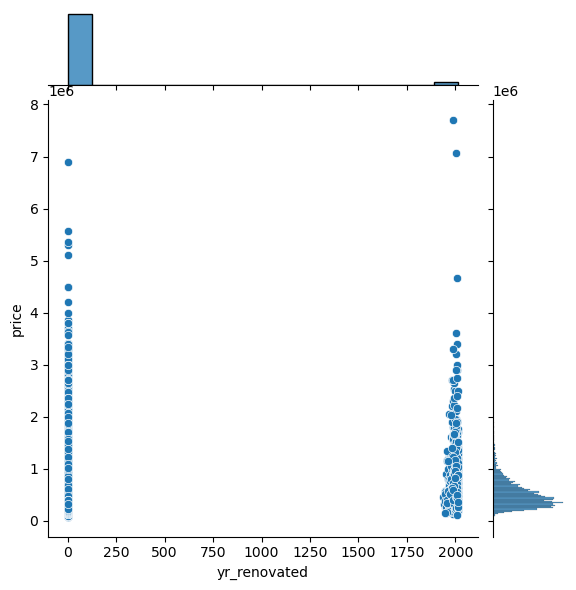

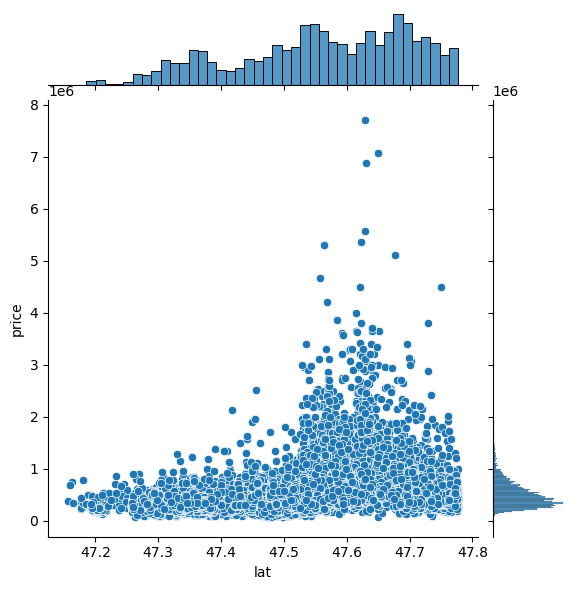

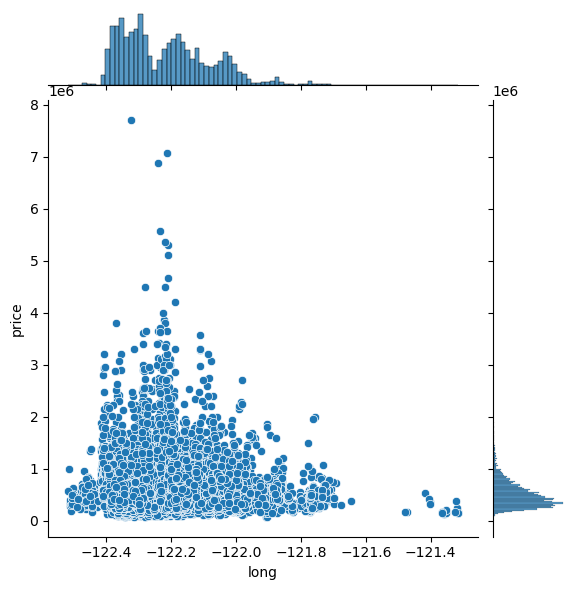

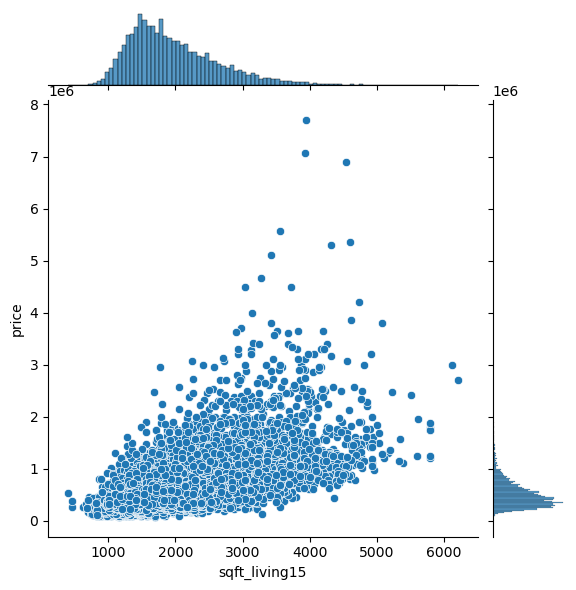

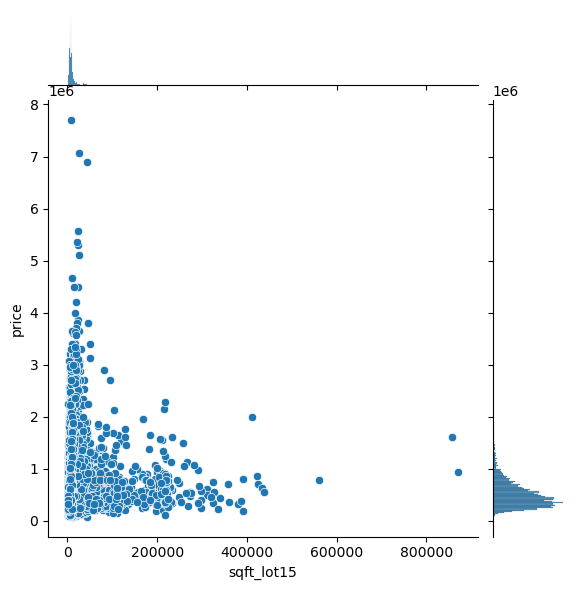

In [12]:
def plot_joint_plot( X_label, Y_label, data):
    sns.jointplot(x=X_label, y=Y_label, data=data)
    
for feature_label in FEATURE_LABELS:
    plot_joint_plot(feature_label, Y_LABEL, data=df)

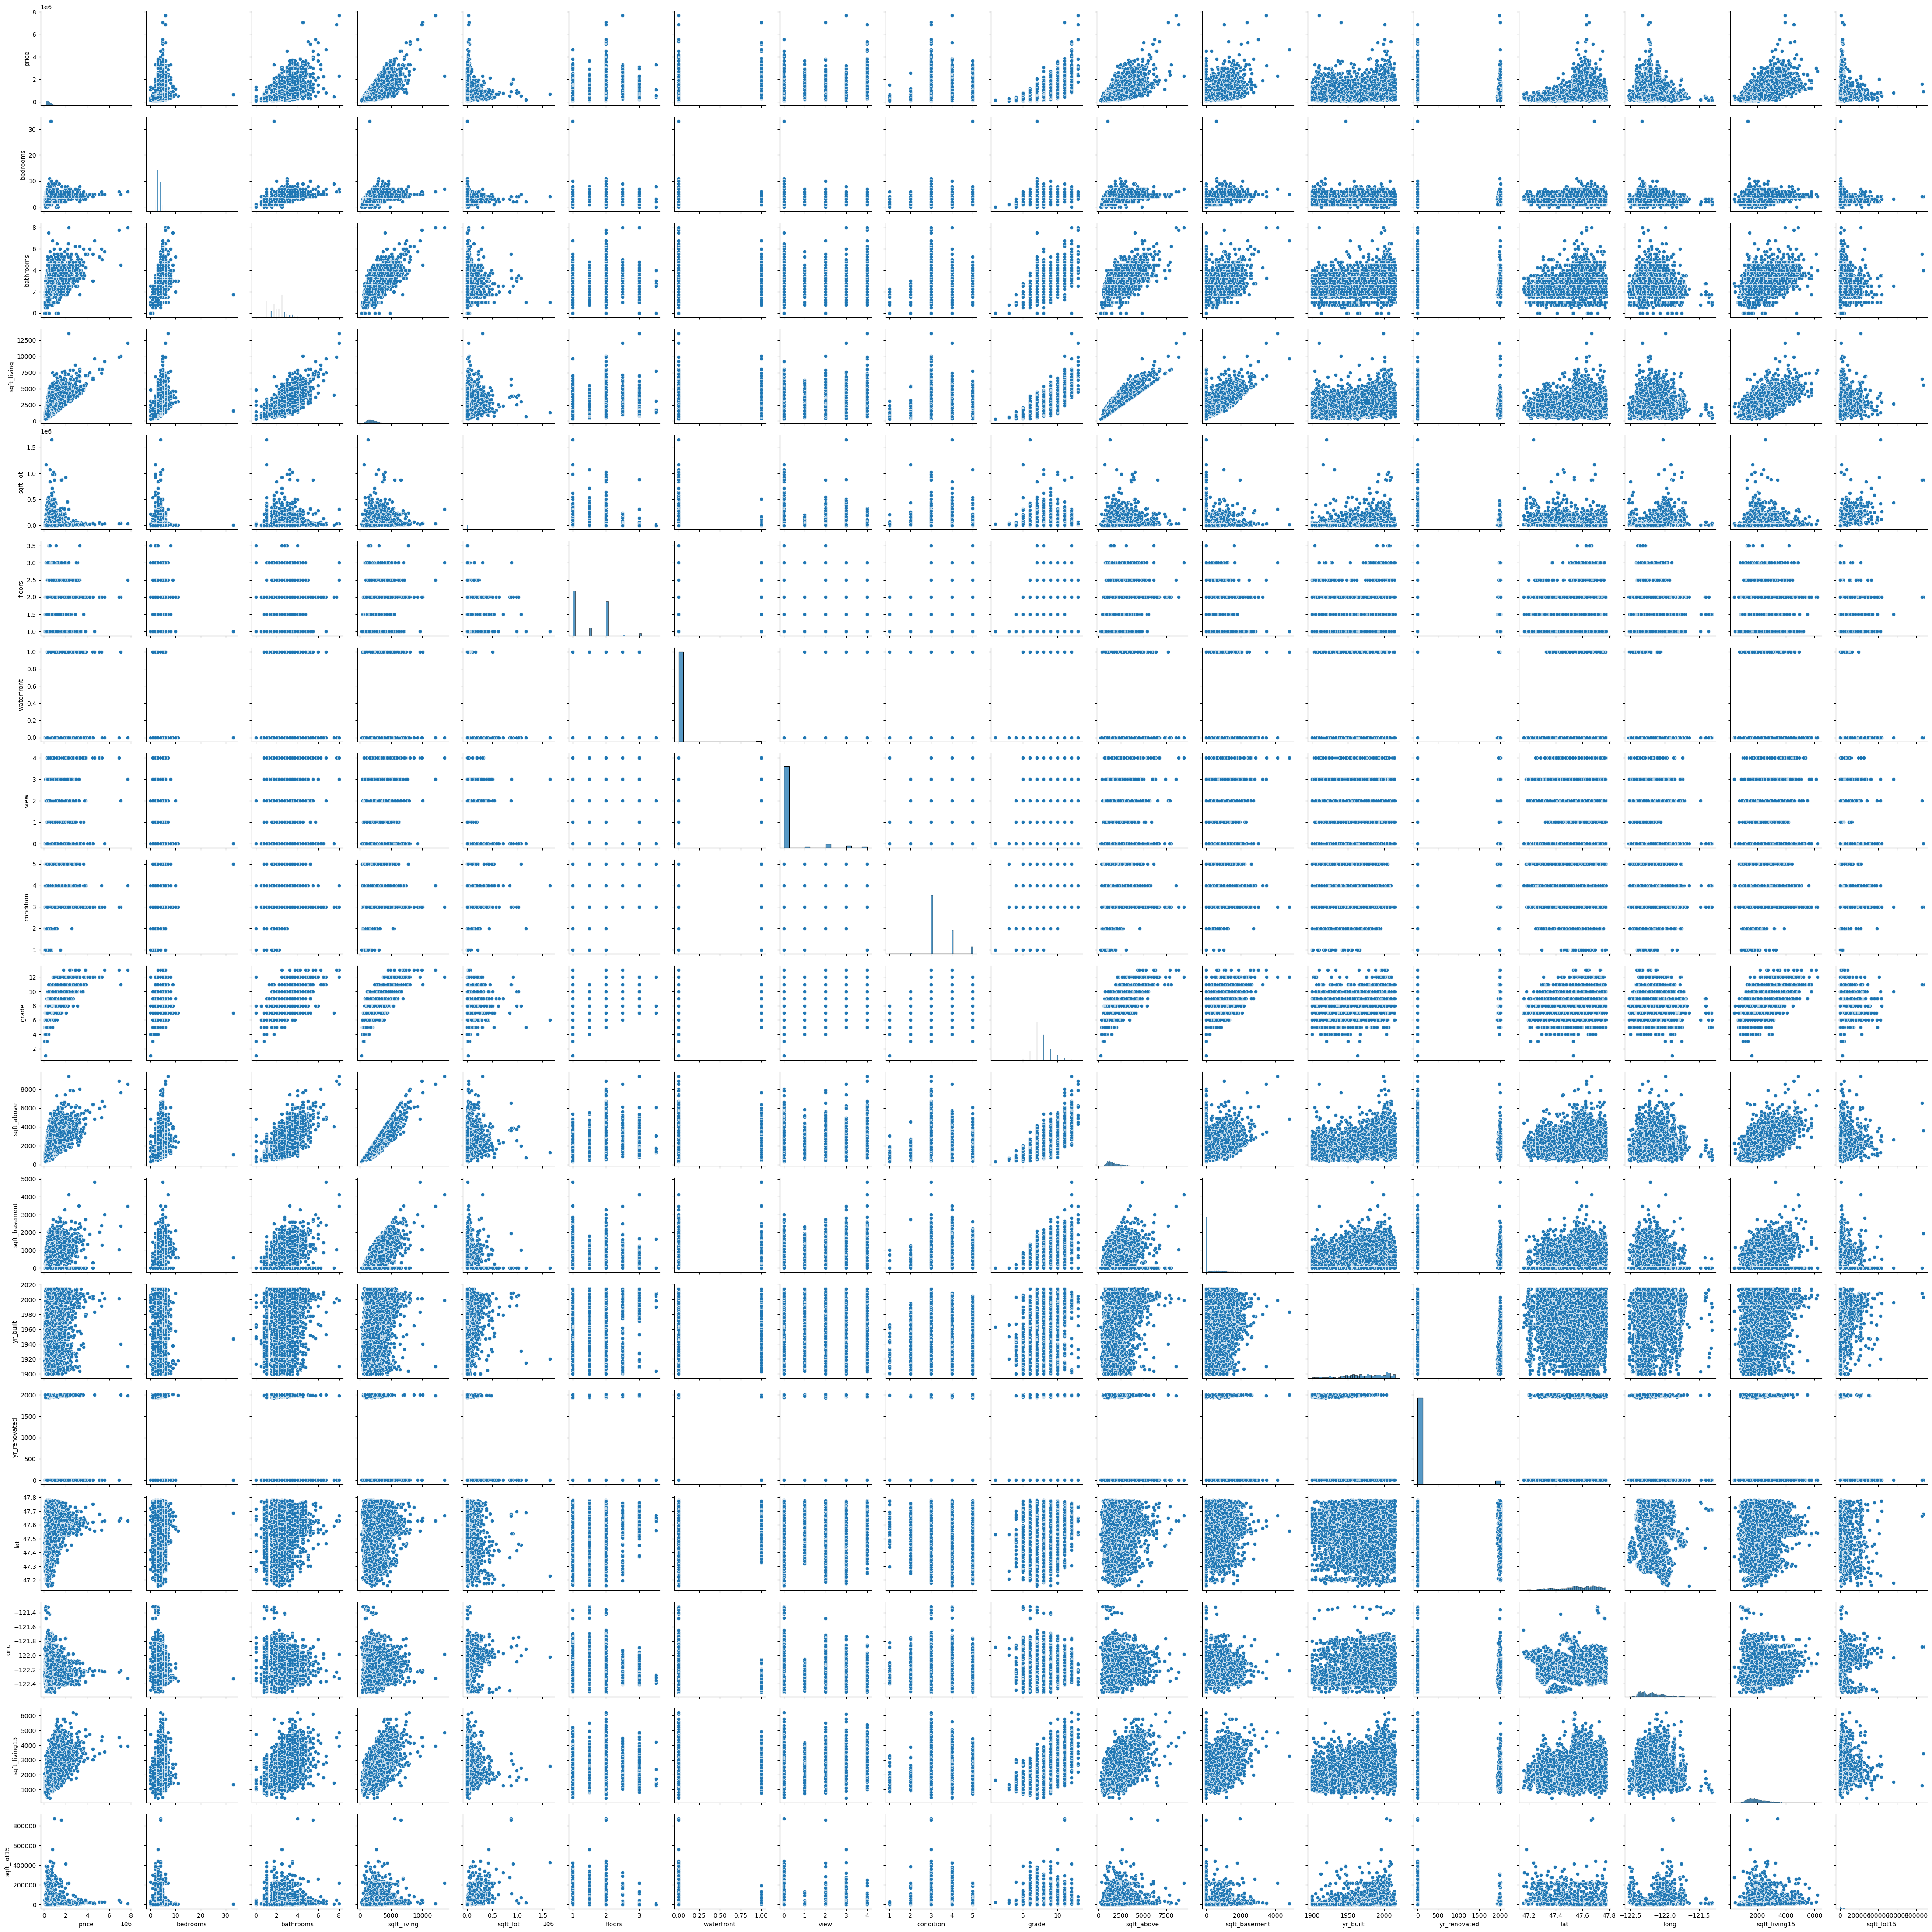

In [13]:
sns.pairplot(df)

<AxesSubplot:>

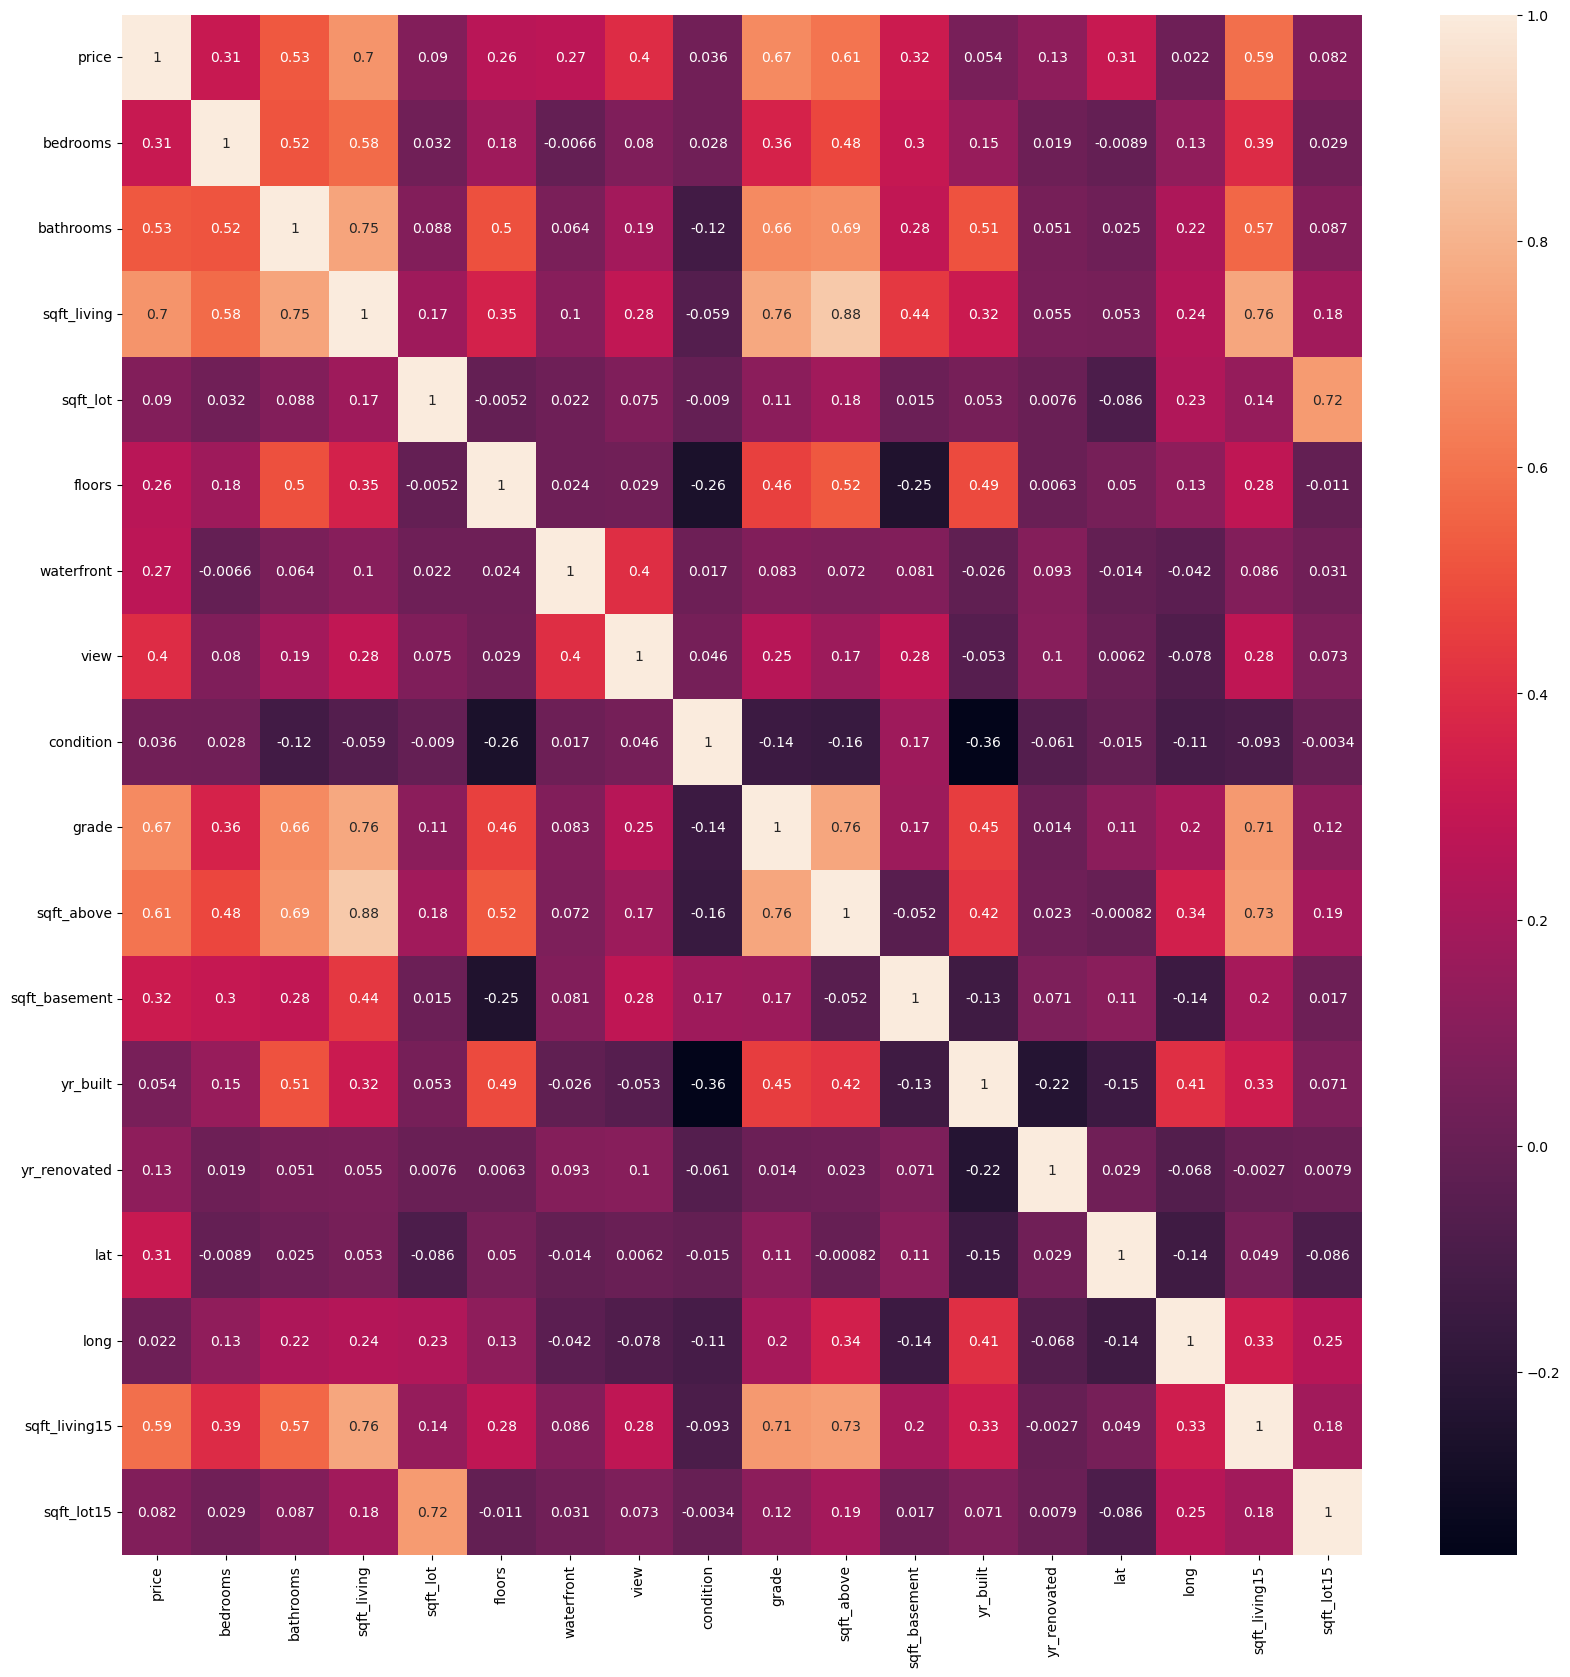

In [14]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)

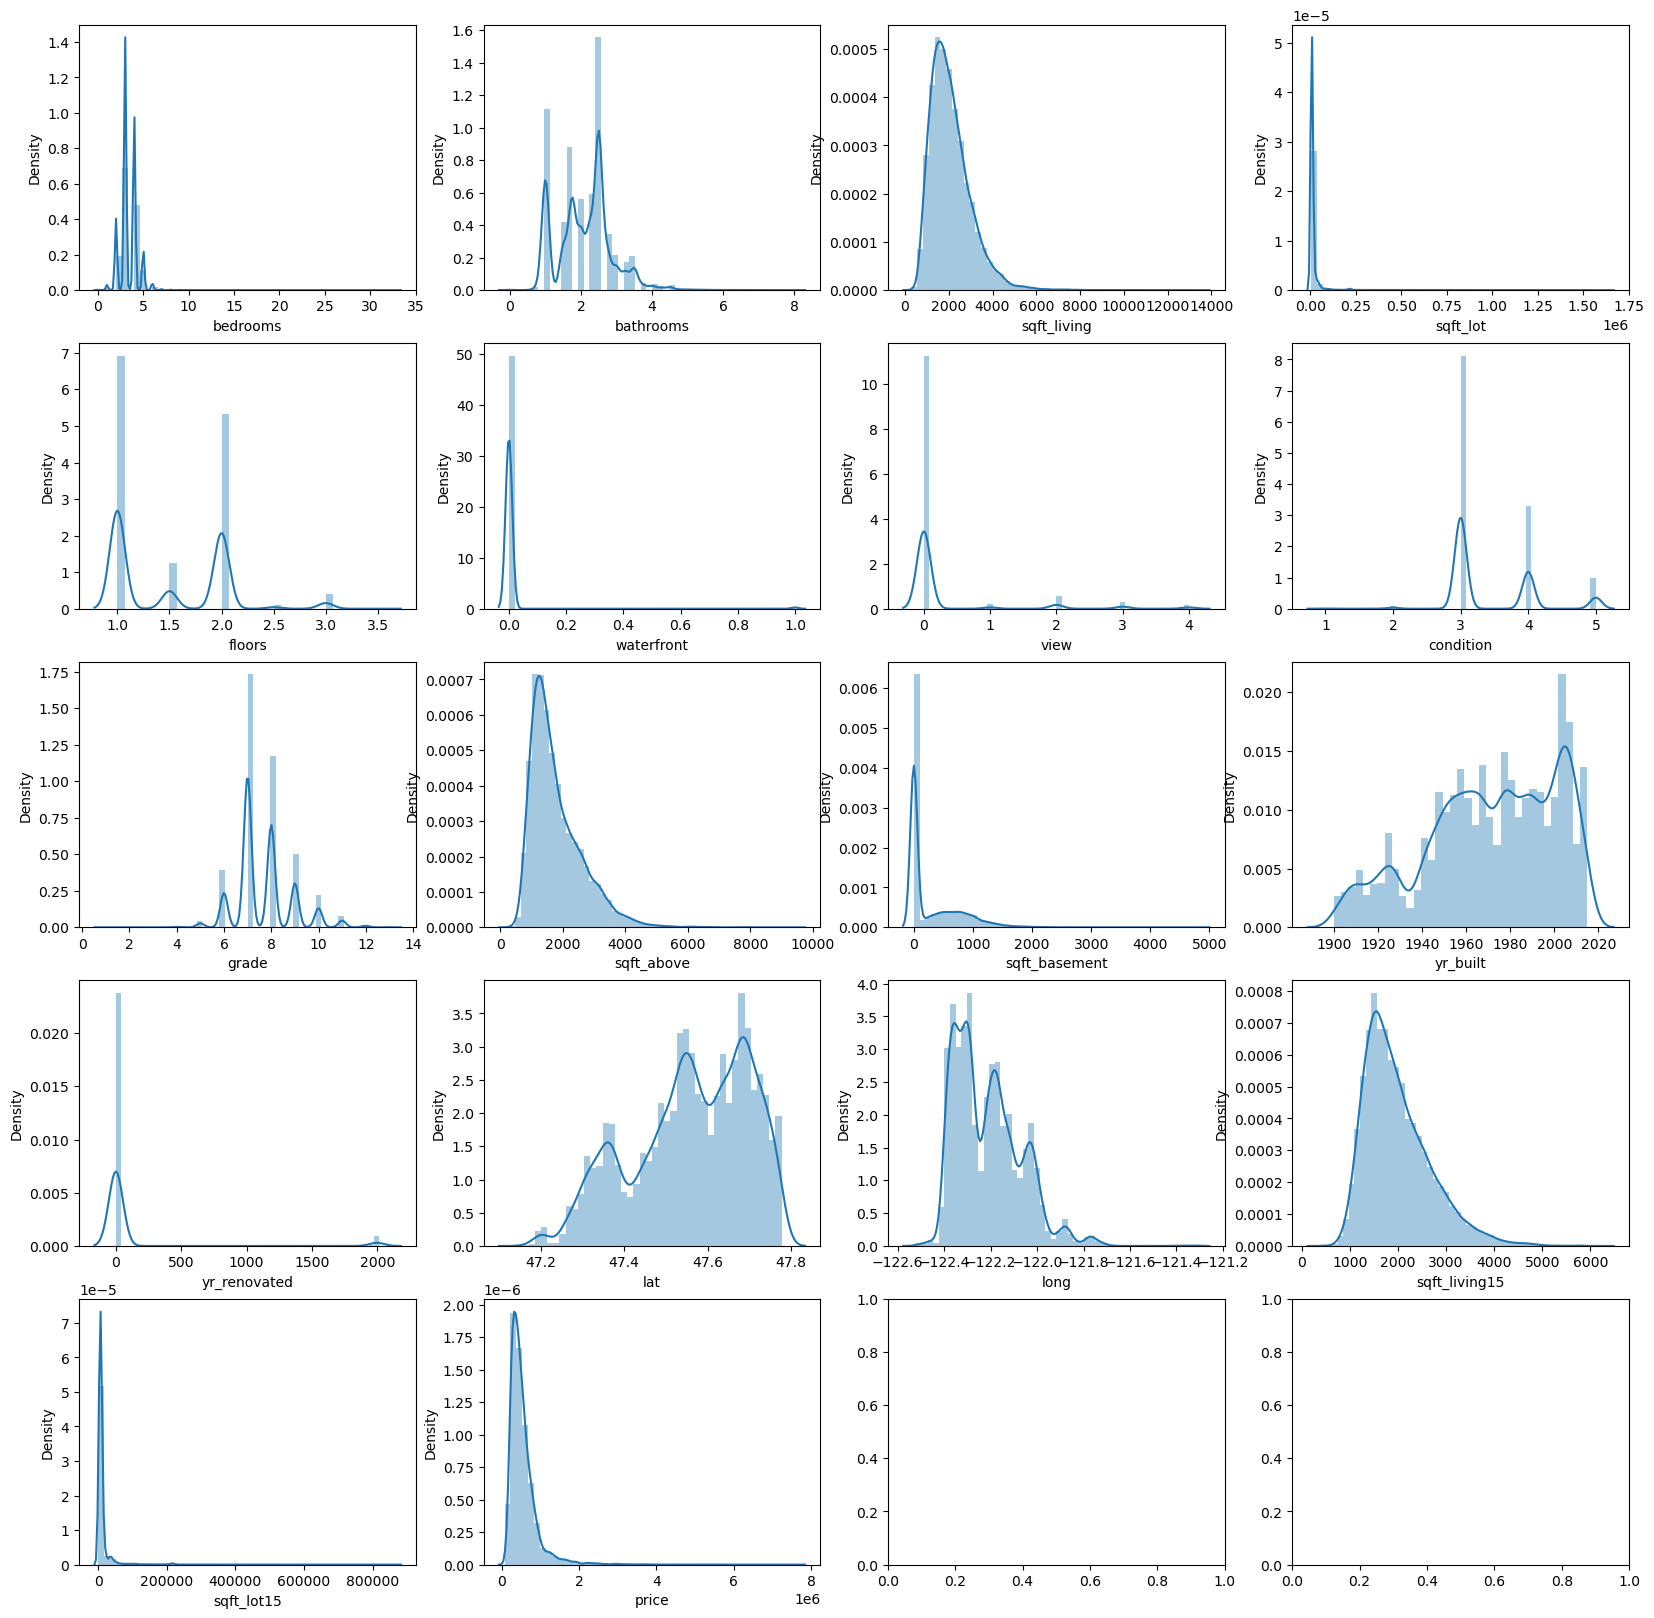

In [15]:
i = 1
fig, ax = plt.subplots(5, 4, figsize = (20, 20))

for feature_label in FEATURE_LABELS+[Y_LABEL]:
    
    plt.subplot(5,4,i)
    sns.distplot(df[feature_label])
    i = i + 1

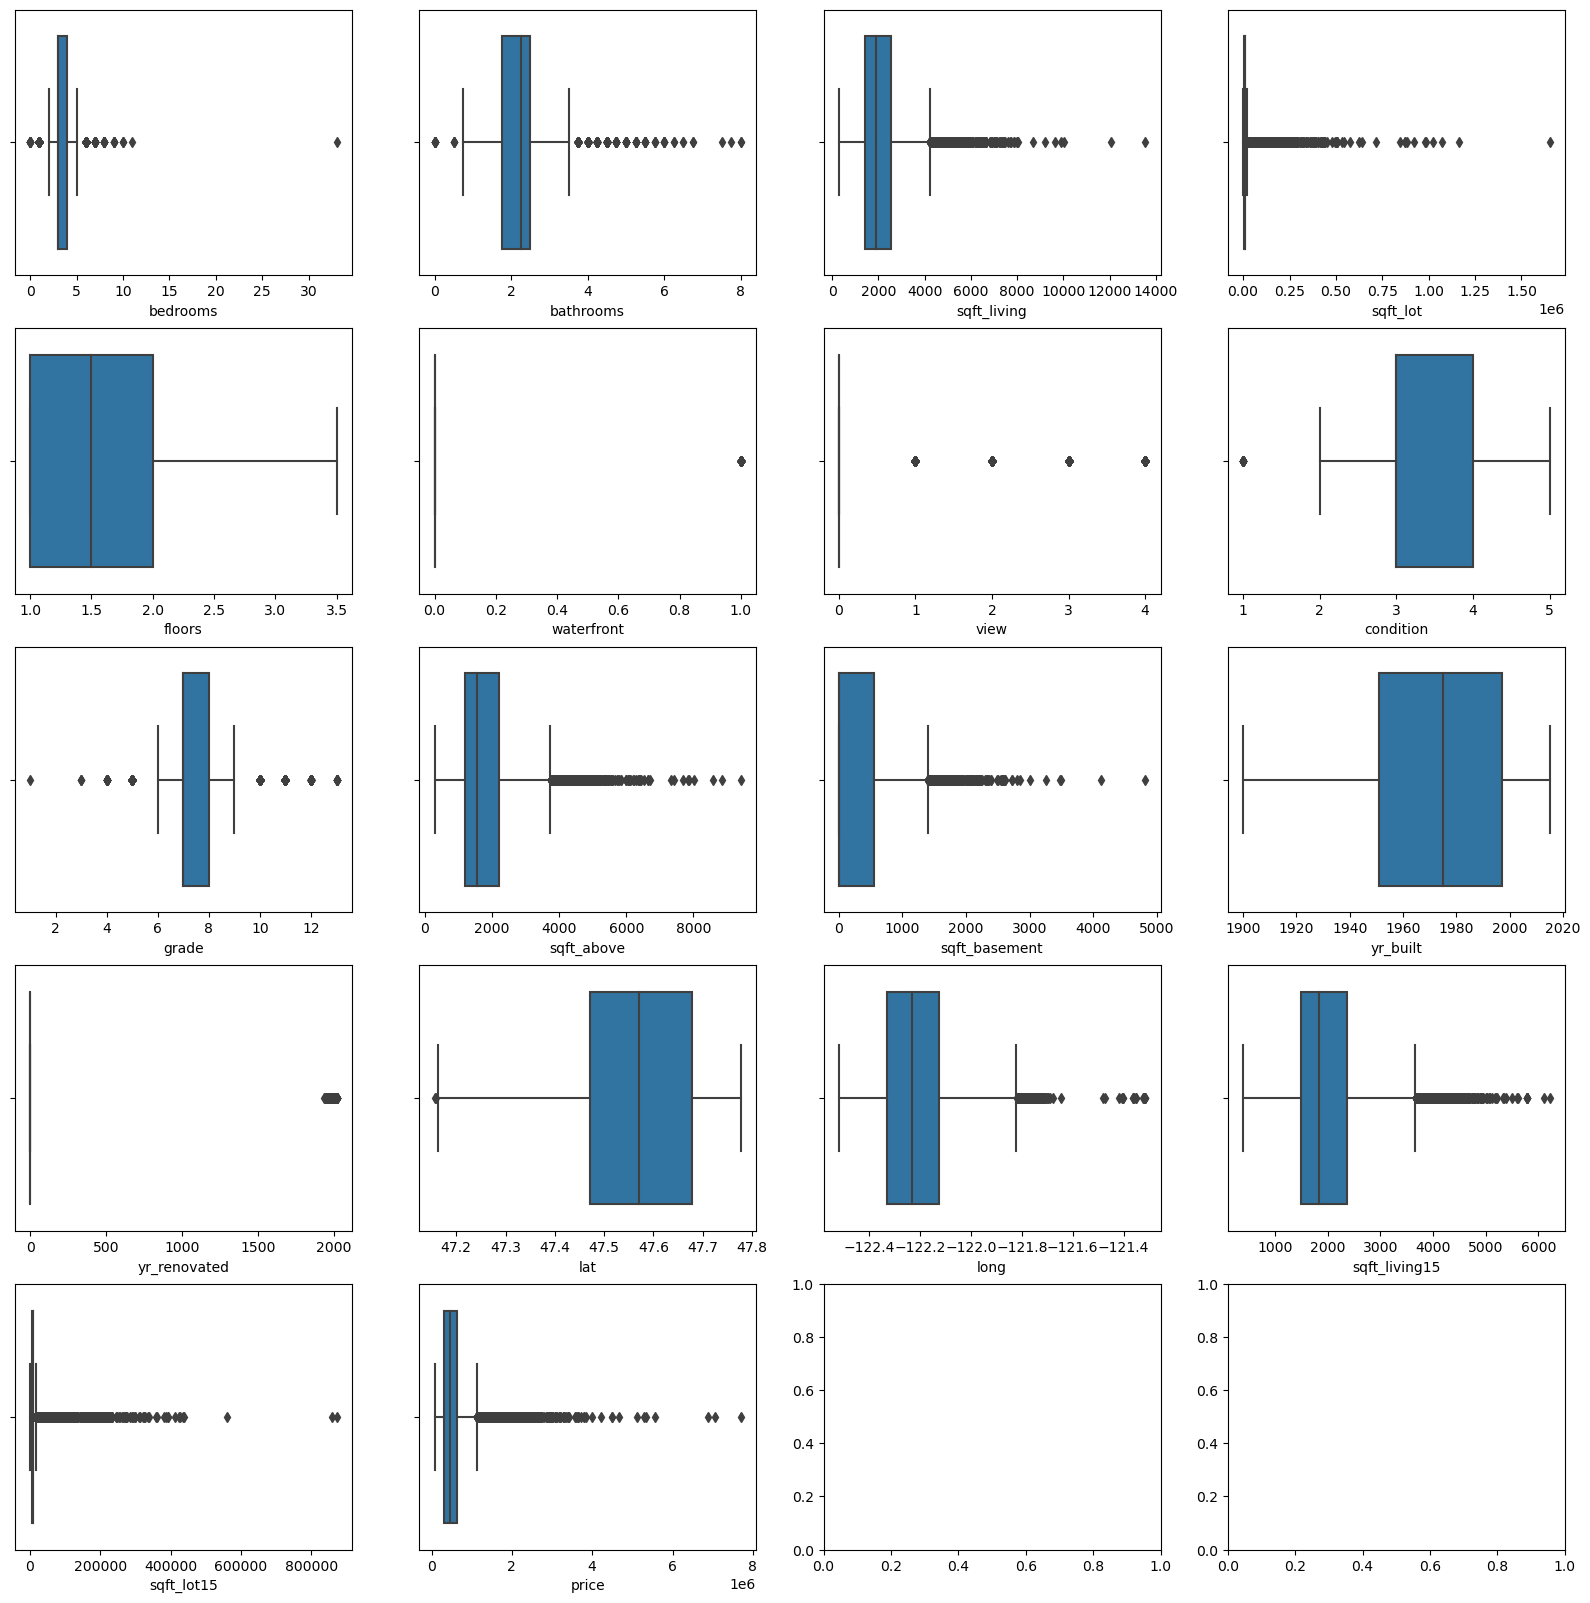

In [16]:
i = 1
fig, ax = plt.subplots(5, 4, figsize = (20, 20))

for column_header in FEATURE_LABELS+[Y_LABEL]:
    plt.subplot(5,4,i)
    sns.boxplot(df[column_header])
    i = i + 1

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

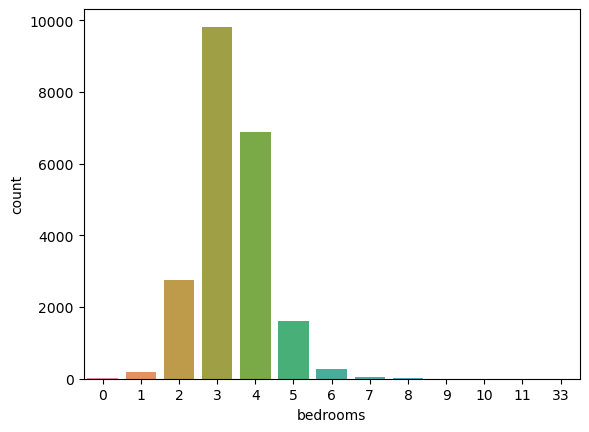

In [17]:
sns.countplot(x=df['bedrooms'])


<AxesSubplot:xlabel='bathrooms', ylabel='count'>

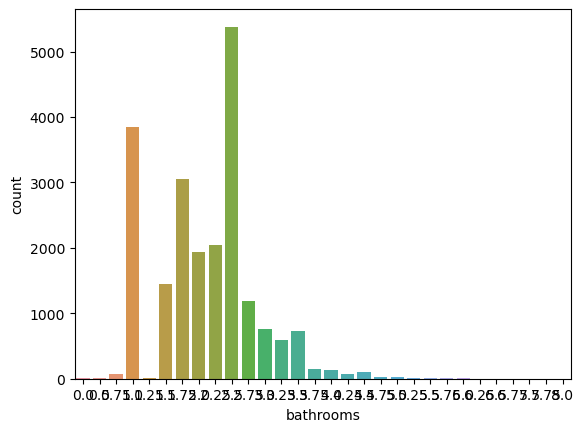

In [18]:
sns.countplot(x=df['bathrooms'])


<AxesSubplot:xlabel='waterfront', ylabel='count'>

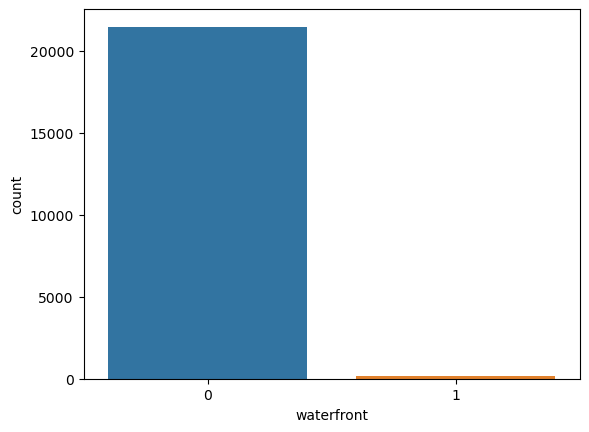

In [19]:
sns.countplot(x=df['waterfront'])


<AxesSubplot:xlabel='condition', ylabel='count'>

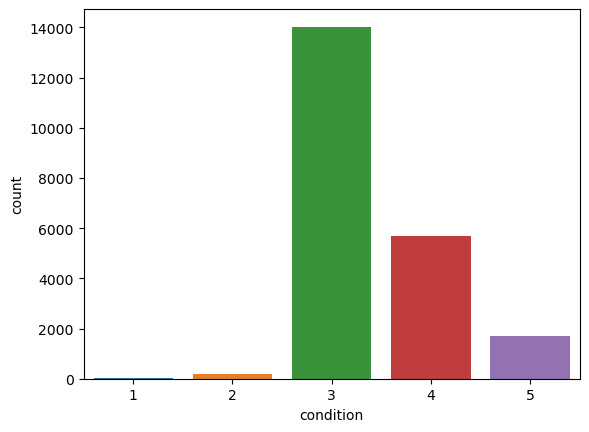

In [20]:
sns.countplot(x=df['condition'])


<AxesSubplot:xlabel='view', ylabel='count'>

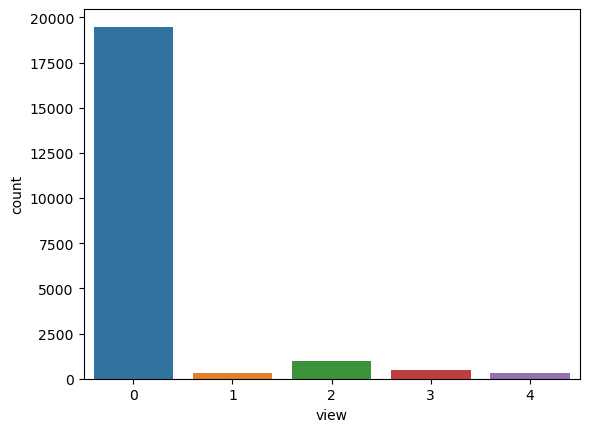

In [21]:
sns.countplot(x=df['view'])


In [22]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()


0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [23]:
df['sqft_basement'].value_counts()

0      13126
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [24]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [25]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
def normalize_features(X):
    return preprocessing.normalize(X, axis=0)

def export_as_graph(clf, f_names):
    dot_data = tree.export_graphviz(clf, 
                         out_file=None, 
                      feature_names=f_names,                  
                      filled=True, rounded=True,  
                     special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph

def create_decision_tree(X_train, Y_train_encoded, feature_names, random_state=0, max_depth=2):
    clf = generate_decision_tree_model(random_state, max_depth, X_train, Y_train_encoded)
    graph = export_as_graph(clf, feature_names)
    return graph, clf

def generate_decision_tree_model(random_state, max_depth, X_train, Y_train_encoded):
    clf = tree.DecisionTreeClassifier(random_state=random_state, max_depth=max_depth)
    clf = clf.fit(X_train, Y_train_encoded)
    return clf

def encode_labels(Y):
    lab_enc = preprocessing.LabelEncoder()
    Y_encoded = lab_enc.fit_transform(Y)
    return Y_encoded

def run_predictions_and_compute_error(model, X_test, Y_test_encoded):
    Y_prediction = model.predict(X_test)
    return mean_squared_error(Y_test_encoded, Y_prediction, squared=False), Y_prediction

In [27]:
X_norm = normalize_features(X)

In [28]:
X_norm

array([[ 0.00583571,  0.00302231,  0.00353021, ..., -0.00680449,
         0.00433737,  0.00127504],
       [ 0.00583571,  0.0068002 ,  0.00768869, ..., -0.00680794,
         0.00547026,  0.0017239 ],
       [ 0.00389048,  0.00302231,  0.00230361, ..., -0.00680315,
         0.00880421,  0.00181936],
       ...,
       [ 0.00389048,  0.00226673,  0.00305154, ..., -0.00680682,
         0.00330158,  0.00045292],
       [ 0.00583571,  0.00755577,  0.00478673, ..., -0.00679402,
         0.00456395,  0.00029044],
       [ 0.00389048,  0.00226673,  0.00305154, ..., -0.00680682,
         0.00330158,  0.00030624]])

In [29]:
Y_encooded = encode_labels(Y)

In [30]:
graph, clf = create_decision_tree(X_norm, Y_encooded, FEATURE_LABELS)

In [31]:
graph.render('housing_decision_tree')

'housing_decision_tree.pdf'

In [32]:
graph, clf = create_decision_tree(X_norm, Y_encooded, FEATURE_LABELS, 0, 8)

In [33]:
graph.render('housing_decision_tree_with_max_depth6')

'housing_decision_tree_with_max_depth6.pdf'

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>],
       [<AxesSubplot:title={'center':'view'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_above'}>],
       [<AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'cen

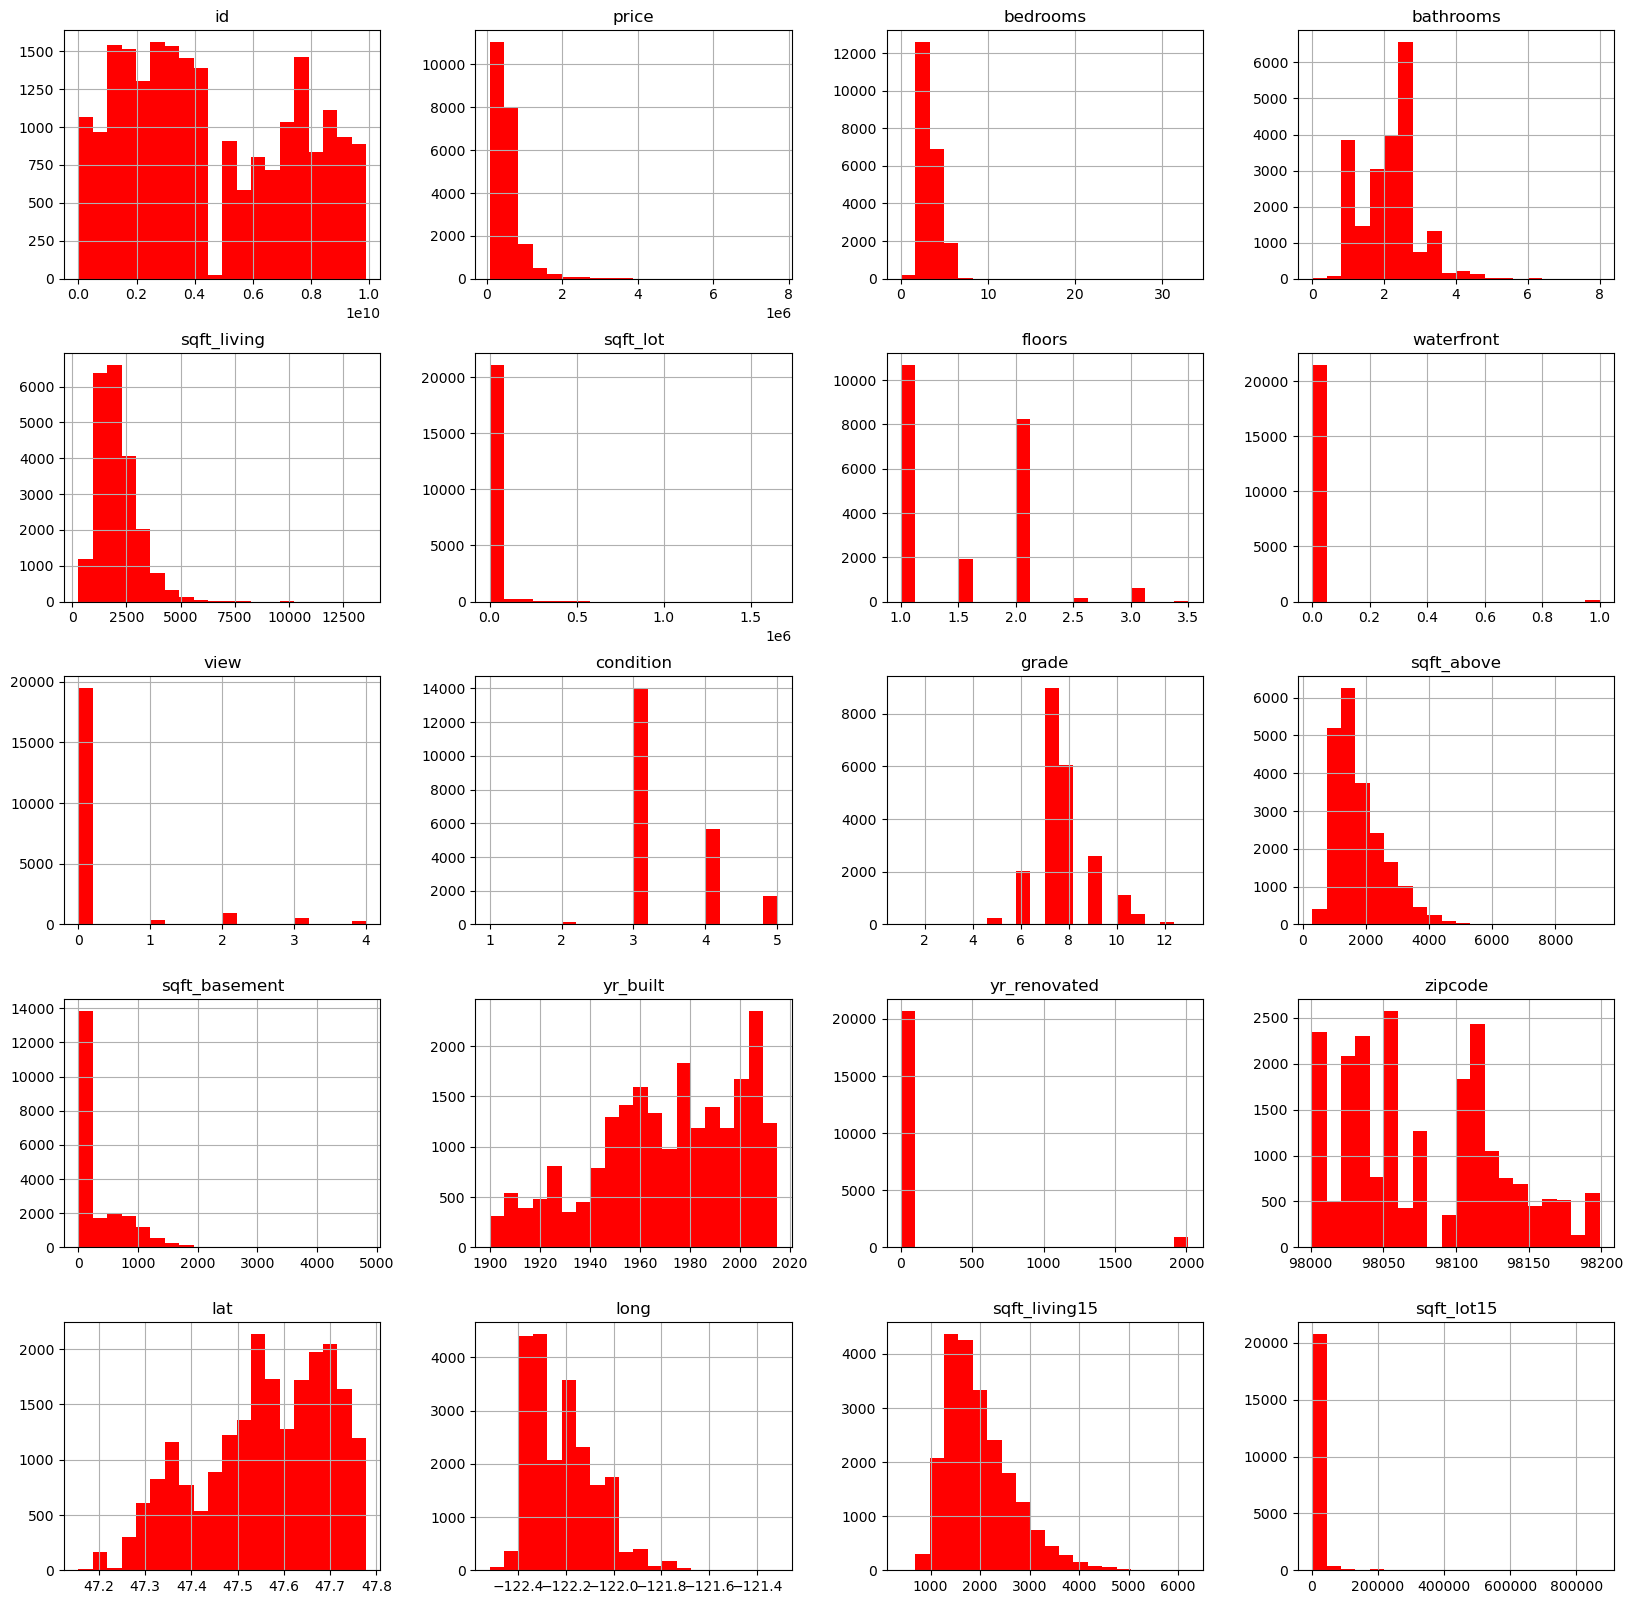

In [47]:
house_df.hist(bins = 20, figsize = (20,20), color = 'r')


In [48]:
house_df_sample = df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

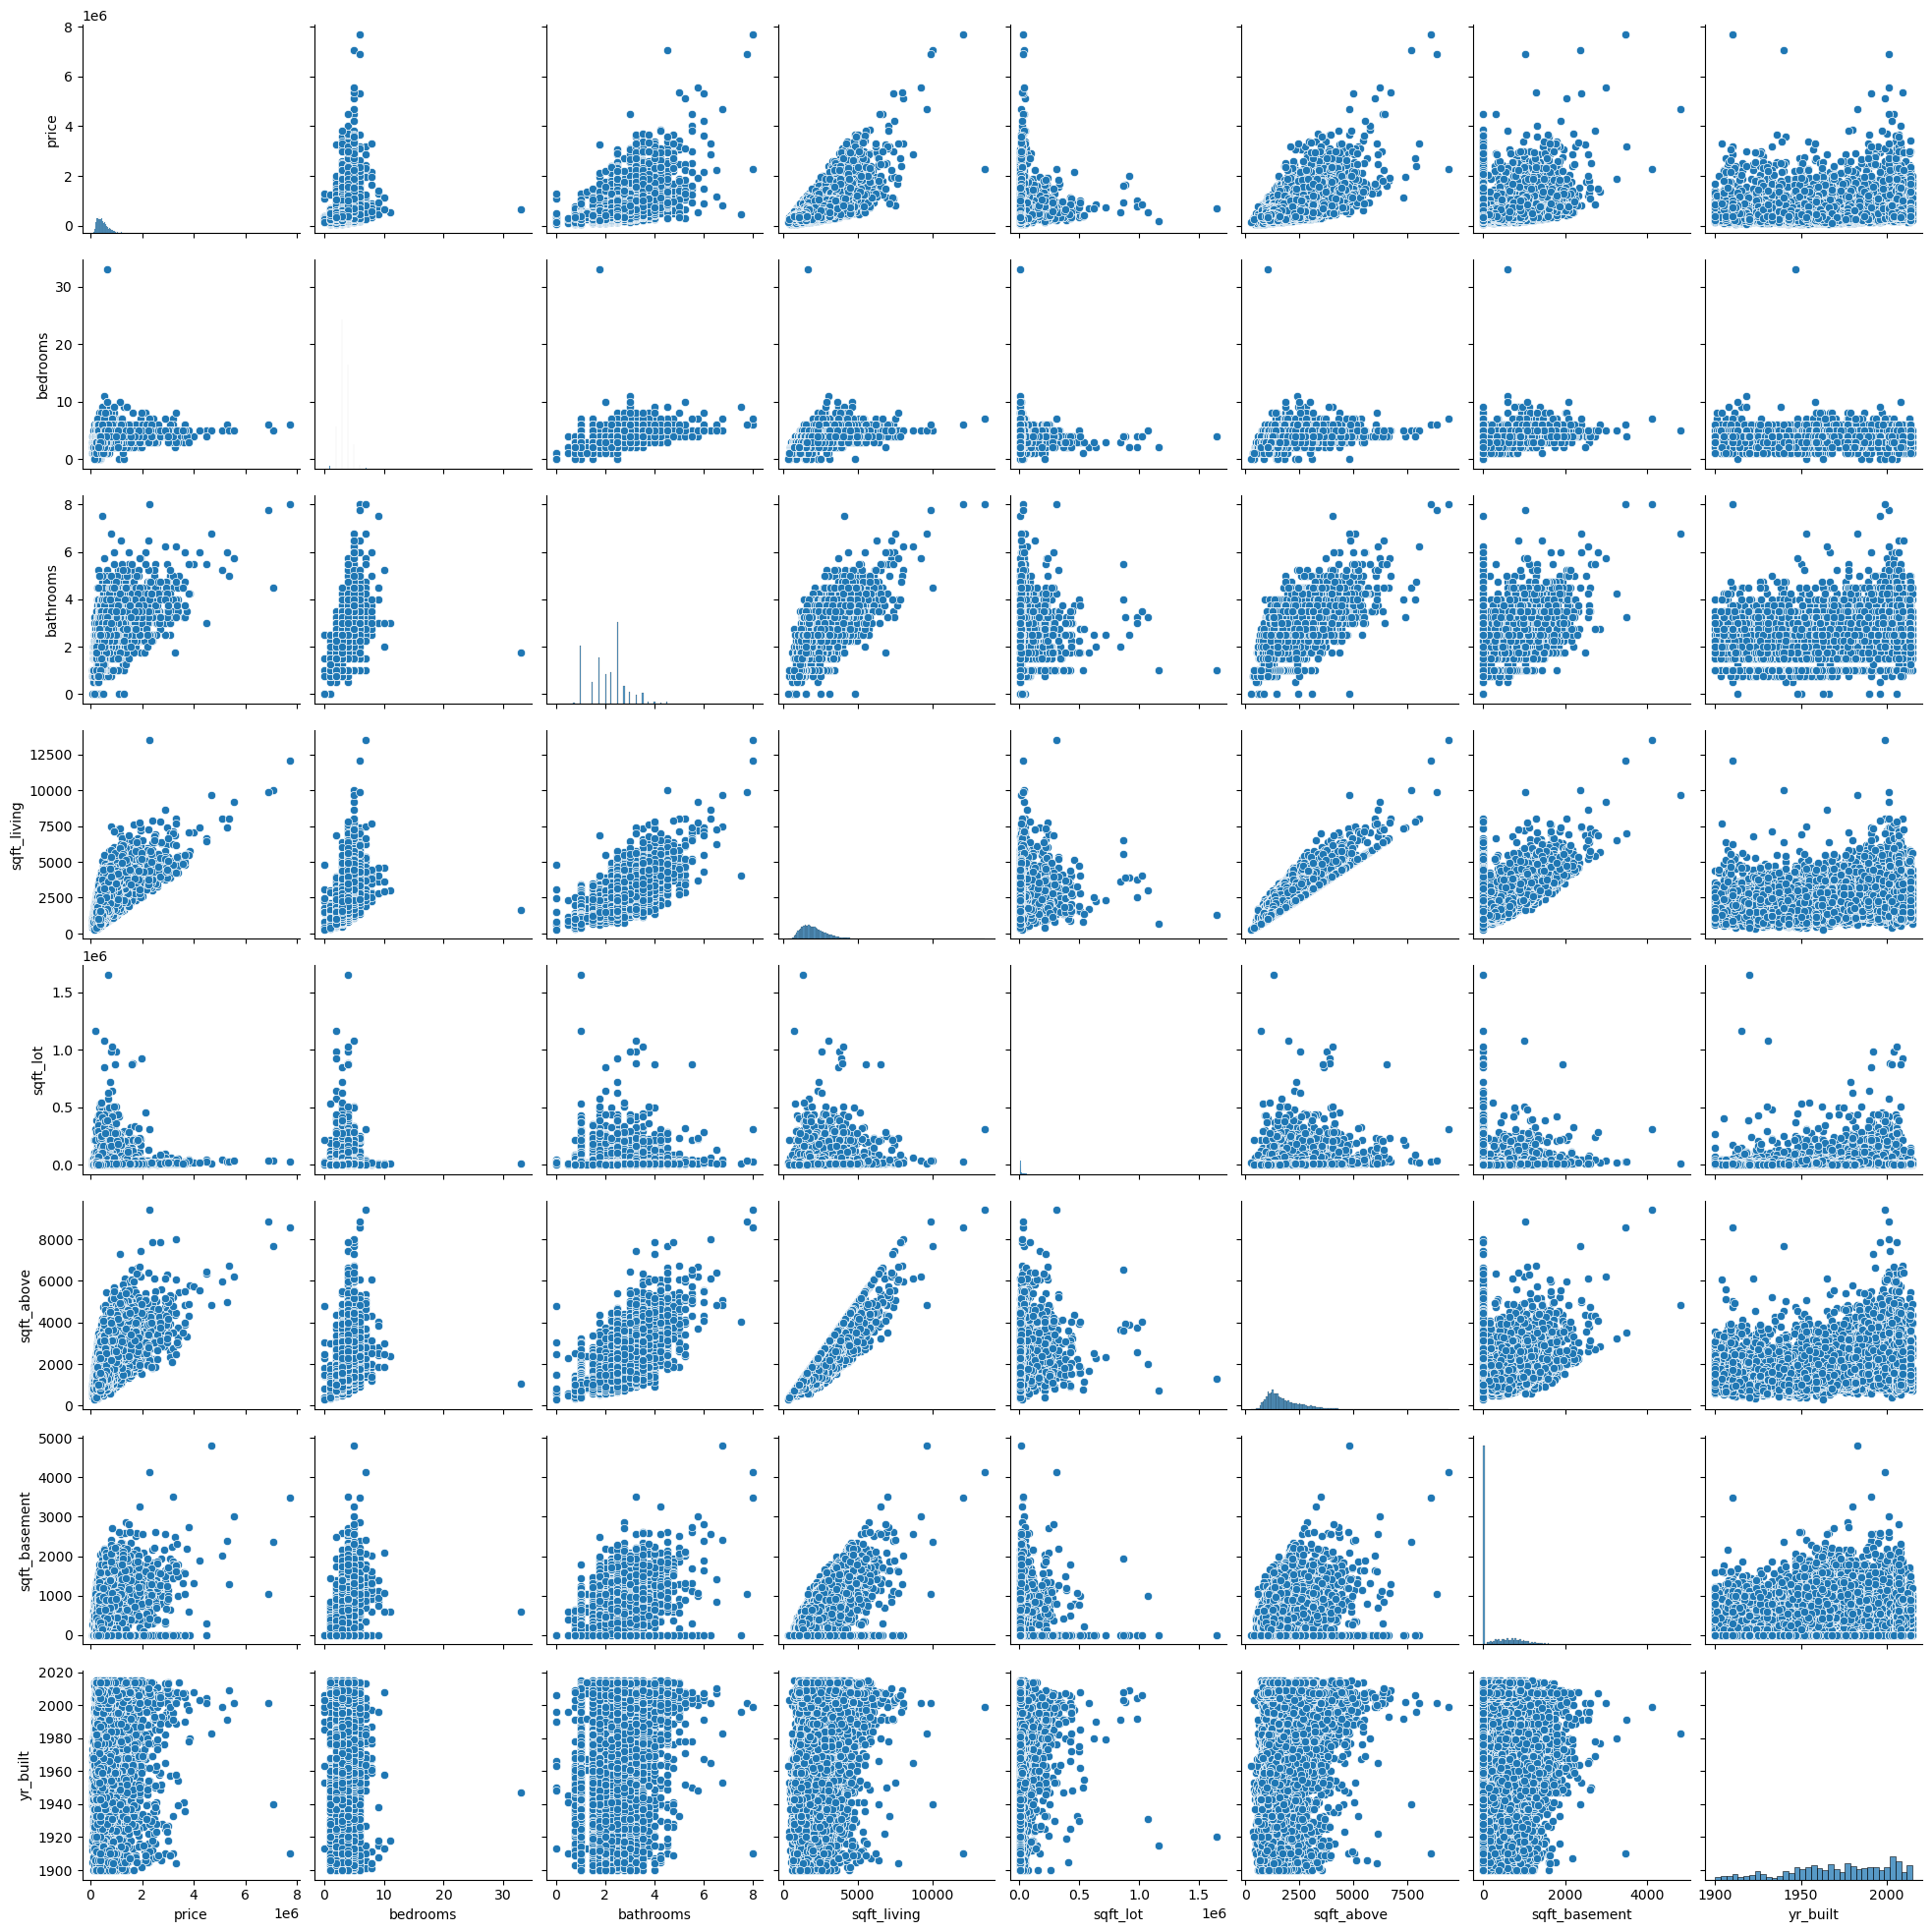

In [49]:
sns.pairplot(house_df_sample)


# Data normalization and Splitting training and test data

In [50]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

X = df[selected_features]


In [71]:
# Data normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [69]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [70]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [73]:
y = Y.values.reshape(-1,1)

Y_scaled = scaler.fit_transform(y)

In [74]:
Y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size = 0.25)

In [83]:
X_train.shape

(16209, 7)

In [87]:
Y_train.shape

(16209, 1)

In [84]:
X_test.shape

(5404, 7)

In [88]:
Y_test.shape

(5404, 1)

# Building and Comparing Models 

In [85]:
def compute_metrics(X, y_test, y_predict):
    k = X.shape[1]
    n = len(X)
    RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
    MSE = mean_squared_error(y_test, y_predict)
    MAE = mean_absolute_error(y_test, y_predict)
    r2 = r2_score(y_test, y_predict)
    adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
    MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100
    print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)
    return [RMSE, MSE, MAE, r2, adj_r2, MAPE]

## Decision tree

In [103]:
X_train_norm = X_train
X_test_norm = X_test

# Decision tree model expects categorical data
Y_train_encode = encode_labels(Y_train)
Y_test_encode = encode_labels(Y_test)

In [95]:
dt_model = generate_decision_tree_model(random_state=0, max_depth=6, X_train=X_train_norm, Y_train_encoded=Y_train_encode)

In [96]:
err, Y_dt_predictions = run_predictions_and_compute_error(dt_model, X_test_norm, Y_test_encode)

In [97]:
err

767.3332973070962

In [98]:
print("-------Training set-------- ")
compute_metrics(X_train_norm, Y_train_encode, dt_model.predict(X_train_norm))

print("--------Test set-----------")
compute_metrics(X_test_norm, Y_test_encode, Y_dt_predictions)

-------Training set-------- 
RMSE =  744.573 
MSE = 554388.232895305 
MAE = 567.8635942994632 
R2 = 0.24592025845505272 
Adjusted R2 = 0.24559444164184274 
MAPE = inf
--------Test set-----------
RMSE =  767.333 
MSE = 588800.3891561806 
MAE = 610.2722057735011 
R2 = -1.9975130597889232 
Adjusted R2 = -2.0014016052704875 
MAPE = inf


[767.333,
 588800.3891561806,
 610.2722057735011,
 -1.9975130597889232,
 -2.0014016052704875,
 inf]

## Linear Regression

In [99]:
lr_model = LinearRegression(fit_intercept = True)
lr_model.fit(X_train, Y_train)

LinearRegression()

In [100]:
print('Linear Model Coeff (m)', lr_model.coef_)
print('Linear Model Coeff (b)', lr_model.intercept_)

Linear Model Coeff (m) [[-2.59943444e-01  4.10467919e-03 -3.93378242e+10 -8.56018410e-02
   4.64050656e-03  2.70762986e+10  1.43100613e+10]]
Linear Model Coeff (b) [0.012627]


In [101]:
Y_lr_train_pred = lr_model.predict(X_train)
Y_lr_pred = lr_model.predict(X_test)

In [102]:
print("-------Training set-------- ")
compute_metrics(X_train, Y_train, Y_lr_train_pred)

print("--------Test set-----------")
compute_metrics(X_test, Y_test, Y_lr_pred)

-------Training set-------- 
RMSE =  0.034 
MSE = 0.0011753955928585373 
MAE = 0.022539817472742255 
R2 = 0.5119296374934637 
Adjusted R2 = 0.5117187559097622 
MAPE = inf
--------Test set-----------
RMSE =  0.032 
MSE = 0.0010222200414447978 
MAE = 0.021431825536707402 
R2 = 0.5003042509889413 
Adjusted R2 = 0.49965601706694773 
MAPE = 46.97323005526984


[0.032,
 0.0010222200414447978,
 0.021431825536707402,
 0.5003042509889413,
 0.49965601706694773,
 46.97323005526984]

## Artificial Neural network

In [115]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

ModuleNotFoundError: No module named 'keras'

In [113]:
!conda activate tf


CommandNotFoundError: Your shell has not been properly configured to use 'conda activate'.
To initialize your shell, run

    $ conda init <SHELL_NAME>

Currently supported shells are:
  - bash
  - fish
  - tcsh
  - xonsh
  - zsh
  - powershell

See 'conda init --help' for more information and options.

IMPORTANT: You may need to close and restart your shell after running 'conda init'.




In [ ]:
import keras